<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>


### Data Analytics of Airbnb Data:

#### Objective:

In this excercise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

You can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata (Accessed 17/07/2023)

This dataset contains information such as the neighborhood offering these services, room type, price, availability, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

## Task 1: Data Loading

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
sns.set_style("ticks")
sns.set_palette("pastel")
sns.set_context("notebook")
sns.set_theme(style="darkgrid")

In [3]:
df = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)

In [4]:
## Display the first 5 rows
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
## Display the data types
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset. 
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [6]:
df["country"].value_counts()

United States    102067
Name: country, dtype: int64

The information from this airbnb dataset is just for New York so we can drop country and country code. We're not planning on conducting geospatial analysis so we can also drop latitude and longitude as neighbourhood will give us the location information we need. Host's names are also not relevant and dropping that information aids anonymity. We will keep listing names for later analysis.

In [7]:
d_col = ["country", "country code", "host id", "id", "host name", "lat", "long"]

In [8]:
df.drop(d_col, axis=1, inplace=True)
df.dtypes

NAME                               object
host_identity_verified             object
neighbourhood group                object
neighbourhood                      object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
house_rules                        object
license                            object
dtype: object

## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [9]:
## Check for missing values in the dataframe and display the count in ascending order.
missing_values = df.isna()
missing_count = missing_values.sum().sort_values(ascending=True)

# view the proportion of missing values
proportion_missing = missing_values.sum() / len(df)
proportion_count = proportion_missing.sort_values(ascending=True)

side_by_side = pd.concat([missing_count, proportion_count], axis=1)
side_by_side.columns = ['Missing Count', 'Proportion']
side_by_side

,Missing Count,Proportion
room type,0,0.000000
neighbourhood,16,0.000156
neighbourhood group,29,0.000283
cancellation_policy,76,0.000741
instant_bookable,105,0.001023
number of reviews,183,0.001784
Construction year,214,0.002086
price,247,0.002407
NAME,250,0.002437
service fee,273,0.002661


License details are almost universally missing and we don't need them for analysis so we'll drop the column. House_rules also is missing over 50% of the values and isn't something you could accurately impute with the tools at hand (or possibly at all). 

Last review and reviews per month could be missing not at random. It could occur when the location itself simply has not received any reviews, this would explain why the missing figures are so similar for the two columns. We'll cross reference against number of reviews.

In [10]:
# checking intuition on reviews confirms our suspicions
df[df["number of reviews"] == 0].shape

(15734, 19)

In [11]:
df["number of reviews"] = df["number of reviews"].fillna(0)
df["reviews per month"] = df["reviews per month"].fillna(0)
df["last review"] = df["last review"].fillna(pd.NaT)

In [12]:
df.drop(["house_rules","license"], axis=1, inplace=True)

All other values are missing at a rate of <5% (and even <0.5%) so we could likely impute or ignore them without serious consequences to our analysis. We will impute price and service fee later after we've converted them to floats. 

We impute the following values with modes if they're categorical and means if they're numeric.

In [13]:
df.host_identity_verified.unique()

array(['unconfirmed', 'verified', nan], dtype=object)

In [14]:
df["host_identity_verified"].fillna(df["host_identity_verified"].mode().values[0], inplace=True)
df["instant_bookable"].fillna(df["instant_bookable"].mode().values[0], inplace=True)
df["cancellation_policy"].fillna(df["cancellation_policy"].mode().values[0], inplace=True)
df["availability 365"].fillna(round(df["availability 365"].mean(), 1), inplace=True)
df["calculated host listings count"].fillna(0, inplace=True)
df["review rate number"].fillna(0, inplace=True)
df["neighbourhood"].dropna(inplace=True)
df.drop(df[df.price.isna() & df["service fee"].isna()].index, inplace = True)
df.isna().sum()

NAME                                250
host_identity_verified                0
neighbourhood group                  29
neighbourhood                        16
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                   214
price                               213
service fee                         239
minimum nights                      409
number of reviews                     0
last review                       15885
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                      0
dtype: int64

In [15]:
## Check whether there are any duplicate values in the dataframe and if present remove them.
df.duplicated().sum()

3638

In [16]:
df.drop_duplicates(inplace=True)
## Display the total number of records in the dataframe after removing the duplicates.
df.shape[0]

98927

## Task 3: Data Transformation and Cleaning Continued


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.
- Impute the remaining values

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshots of your work.

In [17]:
## Rename the column.
df.rename(columns={"availability 365": "days_booked"}, inplace=True)

In [18]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
for column in df.columns:
    new_column = column.lower().replace(" ", "_")
    df.rename(columns={column: new_column}, inplace=True)

In [19]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.
df["price"] = df["price"].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
df["service_fee"] = df["service_fee"].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

We could implement an ML solution to predict price and service fees due to their simple and linear relationship (section 5b) but that seems excessive.
Instead, we'll replacing the missing values with the respective means of their corresponding neighbourhood group. We choose group because neighbourhoods can have too few values to give us a 
meaningful or accurate central tendency. Given the proximity of neighbourhood group means, we could also just choose the mean of all the price and service fee values.

In [20]:
df.neighbourhood_group.value_counts()

Manhattan        42273
Brooklyn         40302
Queens           12799
Bronx             2608
Staten Island      914
brookln              1
manhatan             1
Name: neighbourhood_group, dtype: int64

In [21]:
# fix "brookln" and "manhatan"
incorrect_rows = df["neighbourhood_group"].isin(["brookln", "manhatan"])
df.loc[incorrect_rows, "neighbourhood_group"] = df.loc[incorrect_rows, "neighbourhood_group"].replace("brookln", "Brooklyn").replace("manhatan", "Manhattan")

In [22]:
# fill missing neighbourhood groups if the row has a neighbourhood corresponding to a known neighbourhood group
missing_neighbourhood_group = df["neighbourhood_group"].isnull() & ~df['neighbourhood'].isnull()
mapping = df.loc[~df["neighbourhood_group"].isnull(), ["neighbourhood", "neighbourhood_group"]]
mapping = mapping.drop_duplicates().set_index("neighbourhood")["neighbourhood_group"].to_dict()
df.loc[missing_neighbourhood_group, "neighbourhood_group"] = df.loc[missing_neighbourhood_group, 'neighbourhood'].map(mapping)

In [23]:
# fill missing price and service fees with the neighbourhood grouped means
grouped_means = df.groupby("neighbourhood_group")[["price", "service_fee"]].mean()
df_pre_price = df.copy() # copying the df pre-price and service_fee imputation for later graphing
for index, row in df.iterrows():
    if pd.isnull(row["price"]):
        df.at[index, "price"] = grouped_means.loc[row["neighbourhood_group"], "price"]
    if pd.isnull(row["service_fee"]):
        df.at[index, "service_fee"] = grouped_means.loc[row["neighbourhood_group"], "service_fee"]

In [24]:
# change last_review to a datetime data type
df['last_review'] = pd.to_datetime(df['last_review'], format = "%m/%d/%Y")

We also notice anomalies in the distribution of the minimum nights data

<Axes: xlabel='minimum_nights'>

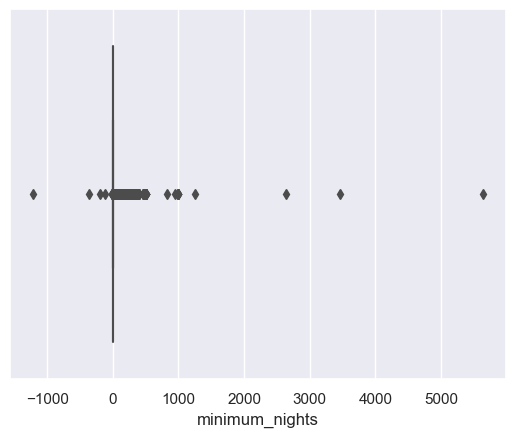

In [25]:
sns.boxplot(x = "minimum_nights", data = df)

Something is wrong with our minimum night values. They should at least be non-negative and not exceeding 2000 days, at least. The cluster around 1000 implies that there may be a reason for it, such as a few listings requiring you to rent out the location for a number of years. More information is needed.

In [26]:
# replace missing values with 0, set all negative minimum_nights to zero and 
# replace those above the 2000 minimum night threshold with the median
df["minimum_nights"] = df["minimum_nights"].fillna(0)
df.loc[df["minimum_nights"] < 0, "minimum_nights"] = 0
threshold = 2000
df.loc[df["minimum_nights"] > threshold, "minimum_nights"] = df["minimum_nights"].median()

Investigating the other fields, we find another outlier in days booked

<Axes: xlabel='days_booked'>

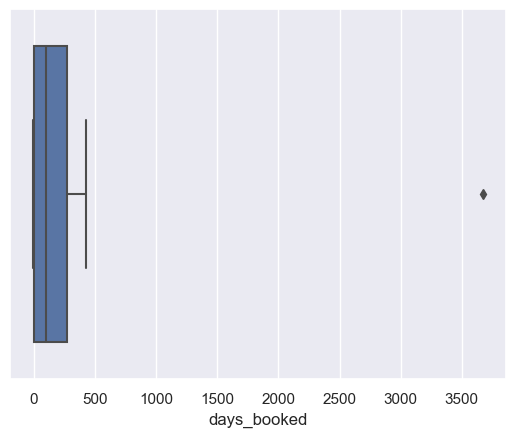

In [27]:
sns.boxplot(x = "days_booked", data = df)

In [28]:
df.loc[df["days_booked"] > 365, "days_booked"] = df["days_booked"].median()

In [29]:
df.dtypes

name                                      object
host_identity_verified                    object
neighbourhood_group                       object
neighbourhood                             object
instant_bookable                            bool
cancellation_policy                       object
room_type                                 object
construction_year                        float64
price                                    float64
service_fee                              float64
minimum_nights                           float64
number_of_reviews                        float64
last_review                       datetime64[ns]
reviews_per_month                        float64
review_rate_number                       float64
calculated_host_listings_count           float64
days_booked                              float64
dtype: object

### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [30]:
## List the count of various room types avaliable with Airbnb
df["room_type"].value_counts()

Entire home/apt    51897
Private room       44773
Shared room         2142
Hotel room           115
Name: room_type, dtype: int64

In [31]:
df["cancellation_policy"].value_counts()

moderate    33192
flexible    32880
strict      32855
Name: cancellation_policy, dtype: int64

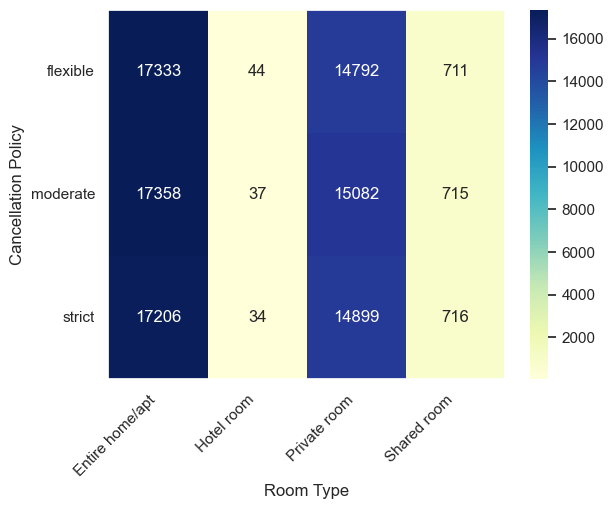

In [32]:
## Which room type adheres to more strict cancellation policy
cross_tab = pd.crosstab(df['cancellation_policy'], df['room_type'])
ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Room Type")
ax.set_ylabel("Cancellation Policy")
for _, spine in ax.spines.items():
    spine.set_visible(True)

# Display the plot
plt.show()

None of the room types have that significant of a difference but shared rooms have more locations with strict cancellation policies, 699 against 695 and 685 locations with moderate and flexible policies respectively.

In [33]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
df_neighbourhoodg = df.groupby("neighbourhood_group")

In [34]:
df_neighbourhoodg['price'].mean().sort_values(ascending=False)

neighbourhood_group
Queens           629.596319
Staten Island    627.277412
Bronx            626.754514
Brooklyn         626.440755
Manhattan        622.708455
Name: price, dtype: float64

In [35]:
df_neighbourhoodg['price'].median().sort_values(ascending=False)

neighbourhood_group
Bronx            630.000000
Staten Island    629.000000
Queens           628.000000
Brooklyn         626.440755
Manhattan        622.708455
Name: price, dtype: float64

The most expensive neighbourhood group by mean is Queens. However, this could be due to a concentration of expensive outlier listings as the median for the Bronx is $1.5 higher than Queens.

## Task 5a: Data Visualization (Any Tool)

- Create a horizontal bar chart to display the top 10 most expensive neighborhoods in the dataset.
    - Create another chart with the 10 cheapest neighborhoods in the dataset.
- Create a box and whisker chart that showcases the price distribution of all listings split by room type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshots of your work.

### Top 10 most expensive and least expensive neighbourhoods
We'll display the top 10 most expensive neighbourhoods by grouping by neighbourhood and looking through the mean of their respective prices, taking the top 10  and converting it back into a dataframe rather than a groupby object. We'll do something similar for the least expensive.

Text(0.5, 1.0, 'Top 10 most expensive neighbourhoods')

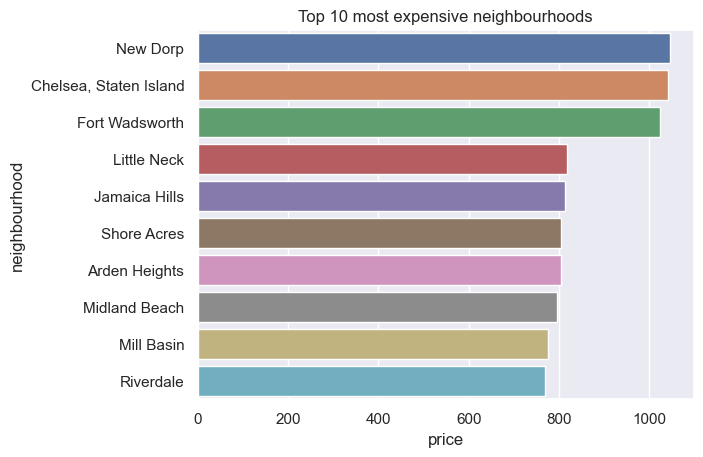

In [36]:
df_neighbourhood_prices_high = df.groupby('neighbourhood')['price'].mean().nlargest(10).reset_index()
sns.barplot(x="price", y="neighbourhood", data=df_neighbourhood_prices_high)
plt.title("Top 10 most expensive neighbourhoods")

Text(0.5, 1.0, 'Top 10 least expensive neighbourhoods')

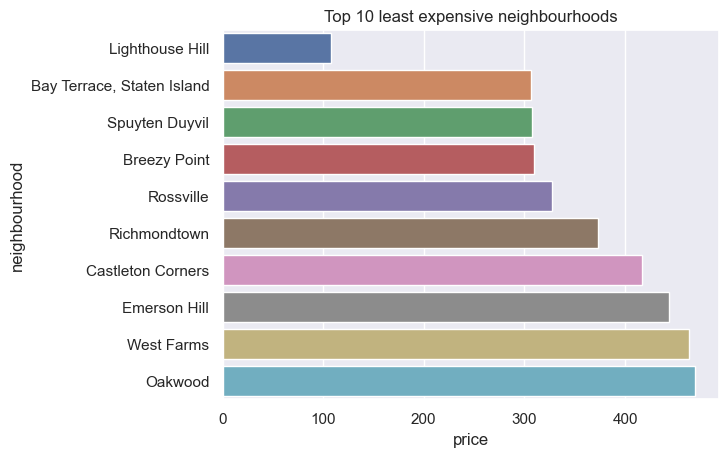

In [37]:
df_neighbourhood_prices_low = df.groupby('neighbourhood')['price'].mean().nsmallest(10).reset_index()
sns.barplot(x="price", y="neighbourhood", data=df_neighbourhood_prices_low)
plt.title("Top 10 least expensive neighbourhoods")

#### Is there any relationship between price and room type?

Text(0.5, 1.0, 'Room Type vs. Price')

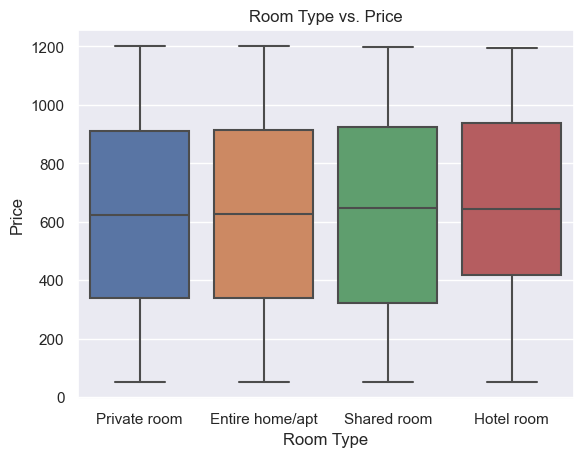

In [38]:
sns.boxplot(x='room_type',y='price', data=df)
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.title("Room Type vs. Price")

Hotel rooms seem to be more expensive, by a narrow margin. This is particularly noticeable in the lower quartile ranges.

## Task 5b: Data Visualization (Any Tool)

- Create a scatter plot to illustrate the relationship between the cleaning fee and the room price and write down the kind of correlation, if any, that you see.
- Create a line chart to showcase the total amount of listings built in each year.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

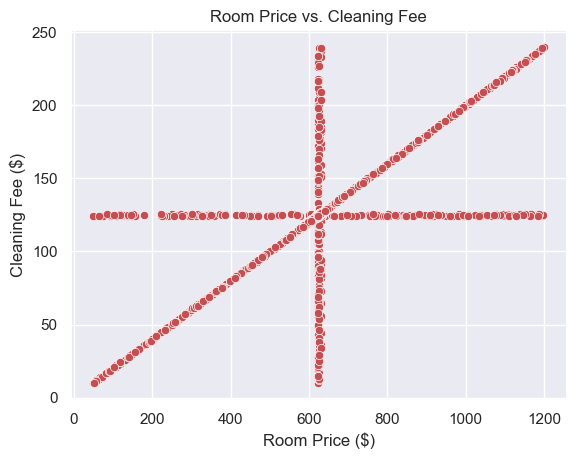

In [39]:
sns.scatterplot(x='price', y='service_fee', color = 'r', data=df)
plt.xlabel('Room Price ($)')
plt.ylabel('Cleaning Fee ($)')
plt.title('Room Price vs. Cleaning Fee')
plt.show()

This plot looks a little confusing due to our imputed values which account for the relatively straight vertical and horizontal lines. We can see this if we plot the graph for the df before we imputed the values. Ignoring these, there is a very strong positive correlation between price and cleaning/service fee. It looks almost like a perfectly linear relationship.

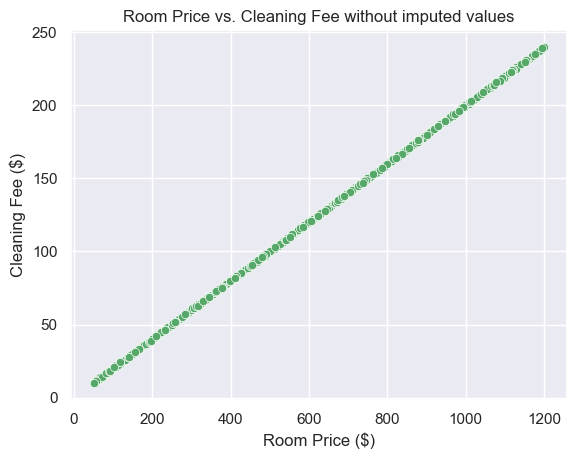

In [40]:
sns.scatterplot(x='price', y='service_fee', color = 'g', data=df_pre_price)
plt.xlabel('Room Price ($)')
plt.ylabel('Cleaning Fee ($)')
plt.title('Room Price vs. Cleaning Fee without imputed values')
plt.show()

We could consider readjusting our imputation method but the scatter misrepresents the significance of these imputed datapoints so I do not think it's necessary.

#### Does Construction Year have any correlation with price? 

Text(0.5, 1.0, 'Listing Construction Year vs. Price')

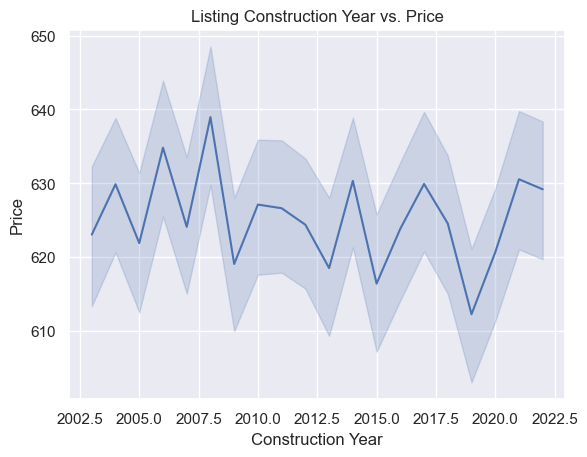

In [41]:
sns.lineplot(x = "construction_year", y = "price", data = df)
plt.xlabel("Construction Year")
plt.ylabel("Price")
plt.title("Listing Construction Year vs. Price")

We don't see any real pattern in price against construction year but there are some spikes in the earlier builds, perhaps surprisingly. It might be that they are storied older builds in affluent parts of the city but would need further investigation.

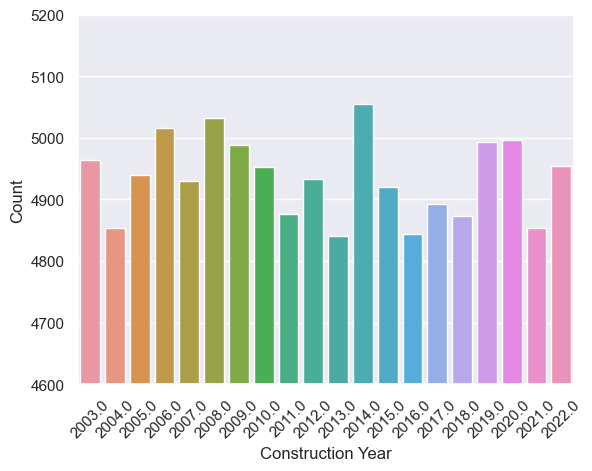

In [42]:
sns.countplot(x = "construction_year", data = df)
plt.xticks(rotation=45)
plt.xlabel("Construction Year")
plt.ylabel("Count")
plt.ylim(4600, 5200)
plt.show()

There's a very even distribution in the construction years of the properties, nothing else to note. 

## Task 5c: Data Visualization

- Create a data visualization of your choosing using one of the review columns in isolation or in combination with another column.
- Create a visualization to compare at least two different variables between verified and unverified hosts.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

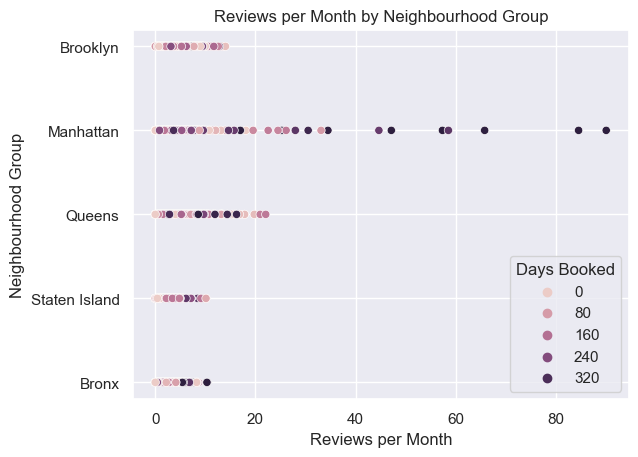

In [43]:
sns.scatterplot(x="reviews_per_month", y="neighbourhood_group", hue="days_booked", data=df)
plt.title("Reviews per Month by Neighbourhood Group")
plt.xlabel("Reviews per Month")
plt.ylabel("Neighbourhood Group")
plt.legend(title="Days Booked")
plt.show()

Text(0.5, 1.0, 'Listings per Neighbourhood Group')

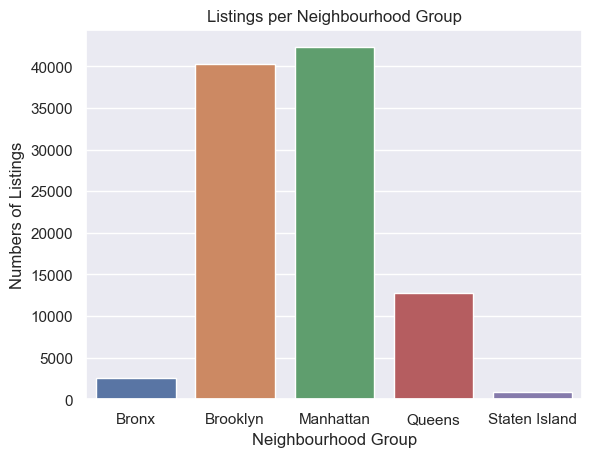

In [44]:
sns.countplot(x = df.neighbourhood_group.sort_values())
plt.xlabel("Neighbourhood Group")
plt.ylabel("Numbers of Listings")
plt.title("Listings per Neighbourhood Group")

Why is Manhattan doing so well for reviews per month, a number of listings boasting an average of more than a review a day? 

Manhatten has a large number of listings, much more than the Bronx or Queens so we might try to explain them away as a number of outliers but if we compare it to Brooklyn, which has comparable numbers, it's still performing well. Moreover, it can't be explained purely through the number of days booked either as we see a number of points in the Bronx, Queens and even in Manhatten which enjoy >320 days booked but still perform relatively poorly in reviews per month. These listings may offer multiple rooms allowing for multiple bookings.

#### What are the main features of listings for Brooklyn and Manhattan?

In [45]:
manhattan_names = df[df['neighbourhood_group'] == "Manhattan"]["name"].astype(str).values
brooklyn_names = df[df['neighbourhood_group'] == "Manhattan"]["name"].astype(str).values

wordcloud1 = WordCloud(background_color='white', width=800, height=400).generate(' '.join(manhattan_names))
wordcloud2 = WordCloud(background_color='white', width=800, height=400).generate(' '.join(brooklyn_names))

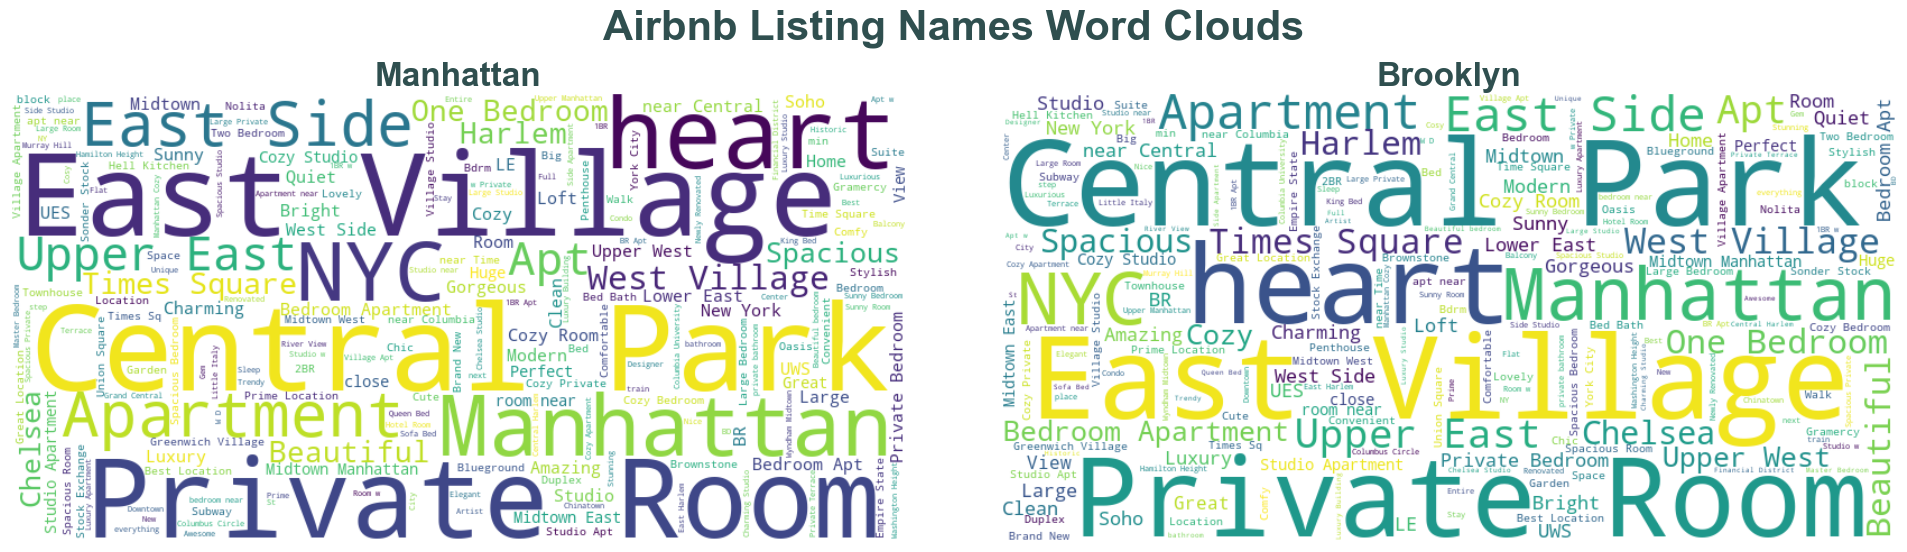

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Manhattan Cloud
ax1.imshow(wordcloud1, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Manhattan', fontsize=24, fontweight='bold', color='darkslategray')

# Brooklyn Cloud
ax2.imshow(wordcloud2, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Brooklyn', fontsize=24, fontweight='bold', color='darkslategray')

plt.tight_layout()
plt.suptitle('Airbnb Listing Names Word Clouds', fontsize=30, fontweight='bold', color='darkslategray',y=1.10)
plt.show()

The two word clouds are very similar. There's a focus on privacy and, though not unexpecteced, Brooklyn's main selling point seems to be it's proximity to Manhattan as demonstrated by the significant use of "Manhattan", "Central Park", "East Village" (a lower eastern district of Manhattan) and "heart" (probably related to distance from the heart). This could also partially explain the lack of reviews for Brooklyn based listings. The location is a means to an end whereas Manhattan is the point.

### Is verification status of hosts significant?

Text(0.5, 1.0, 'Host Verification Status')

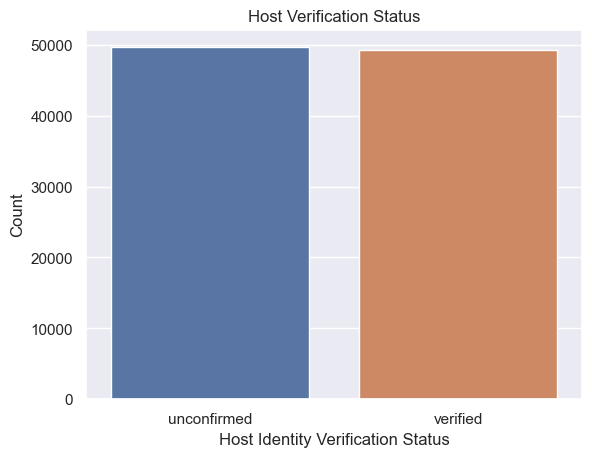

In [47]:
sns.countplot(x = "host_identity_verified", data=df)
plt.xlabel("Host Identity Verification Status")
plt.ylabel("Count")
plt.title("Host Verification Status")

It's surprising that the number of hosts with unconfirmed identities are comporable with and even exceed those with verified identities especially when one might consider the risks associated with staying at someone else's property. People may feel less comfortable using airbnb if this were the general case.

We'll examine the verification status against a few other variables to see if there seems to be any superficial correlation that we can dig into deeper.

In [48]:
pd.crosstab(df.host_identity_verified, df.neighbourhood_group)

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
host_identity_verified,,,,,
unconfirmed,1335,20245,21197,6424,470
verified,1274,20071,21090,6377,444


In [49]:
pd.crosstab(df.host_identity_verified, df.cancellation_policy)

cancellation_policy,flexible,moderate,strict
host_identity_verified,,,
unconfirmed,16454,16735,16482
verified,16426,16457,16373


In [50]:
df.groupby("host_identity_verified")["price"].mean()

host_identity_verified
unconfirmed    626.803360
verified       623.723096
Name: price, dtype: float64

In [51]:
df.groupby("host_identity_verified")["minimum_nights"].mean()

host_identity_verified
unconfirmed    8.089992
verified       7.981972
Name: minimum_nights, dtype: float64

In [52]:
df.groupby("host_identity_verified")["days_booked"].mean()

host_identity_verified
unconfirmed    134.533810
verified       133.201659
Name: days_booked, dtype: float64

There is really no clear pattern emerging with any of the fields w.r.t. host identity verification so, saving some new information, it wouldn't be meaningful to visualize the data. 